In [1]:
import numpy as np
import matplotlib.pyplot as plt                 #For plotting
from matplotlib import cm, colors
figlist = []
#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                           
params = {'figure.figsize': (16, 12),
          'xtick.labelsize':'xx-large',
          'ytick.labelsize':'xx-large',
          'text.usetex': False,
          'lines.linewidth': 4,
          'font.family': 'serif',
          'font.serif': 'Georgia',
          'font.size': 20,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'xtick.labelsize': 'medium',
          'ytick.labelsize': 'medium',
          'axes.labelsize': 'medium',
          'axes.titlesize':'medium',
          'axes.grid.axis': 'both',
          'axes.grid.which': 'both',
          'axes.grid': True,
          'grid.color': 'xkcd:cement',
          'grid.alpha': 0.3,
          'lines.markersize': 12,
          'lines.linewidth': 2.0,
          'legend.borderpad': 0.2,
          'legend.fancybox': True,
          'legend.fontsize': 'medium',
          'legend.framealpha': 0.8,
          'legend.handletextpad': 0.5,
          'legend.labelspacing': 0.33,
          'legend.loc': 'best',
          'savefig.dpi': 140,
          'savefig.bbox': 'tight',
          'pdf.compression': 9}
pylab.rcParams.update(params)
#********************************************************************************************************
import os
import time

In [2]:
dataDir = '../dailyBeatNoteData/'
# dataDir = '/Users/anchal/Git/cit_ctnlab/ctn_labdata/data/20200523_SuperBNMeasurementSR/Data/'
cwd = os.getcwd()
os.chdir(dataDir)
fl = [f for f in os.listdir() if f.find('TransRIN')!=-1]
os.chdir(cwd)

In [3]:
def fnTomktime(fn):
    fn = fn.replace('.txt', '')
    tstamp = fn[fn.find('_')+1:]
    tstruc = time.strptime(tstamp, '%Y%m%d_%H%M%S')
    return time.mktime(tstruc)
def fnToLabel(fn):
    fn = fn.replace('.txt', '')
    tstamp = fn[fn.find('_')+1:]
    tstruc = time.strptime(tstamp, '%Y%m%d_%H%M%S')
    return time.strftime('%b %d, %Y TransRIN', tstruc)
def plotRIN(filename, fig=None):
    if fig is None:
        fig = plt.figure()
    ax = fig.gca()
    RINdata = np.loadtxt(filename)
    with open(filename, 'r') as f:
        header = f.readline()
    temp = header[header.find('North DC Val:')+13:].replace(' ', '')
    NDC = float(temp.split('Volts')[0])
    temp = header[header.find('South DC Val:')+13:].replace(' ', '')
    SDC = float(temp.split('Volts')[0])
    cpb = int((np.shape(RINdata)[1]-1)/2)
    RINdata[:, 1:cpb+1] = RINdata[:, 1:cpb+1]/NDC
    RINdata[:, cpb+1:] = RINdata[:, cpb+1:]/SDC
    ax.loglog(RINdata[:, 0], RINdata[:, 1], label=fnToLabel(filename)+'-North')
    #ax.loglog(RINdata[:, 0], RINdata[:, 2], label=fnToLabel(filename)+'-South')
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('RIN')
    ax.legend()
    return fig

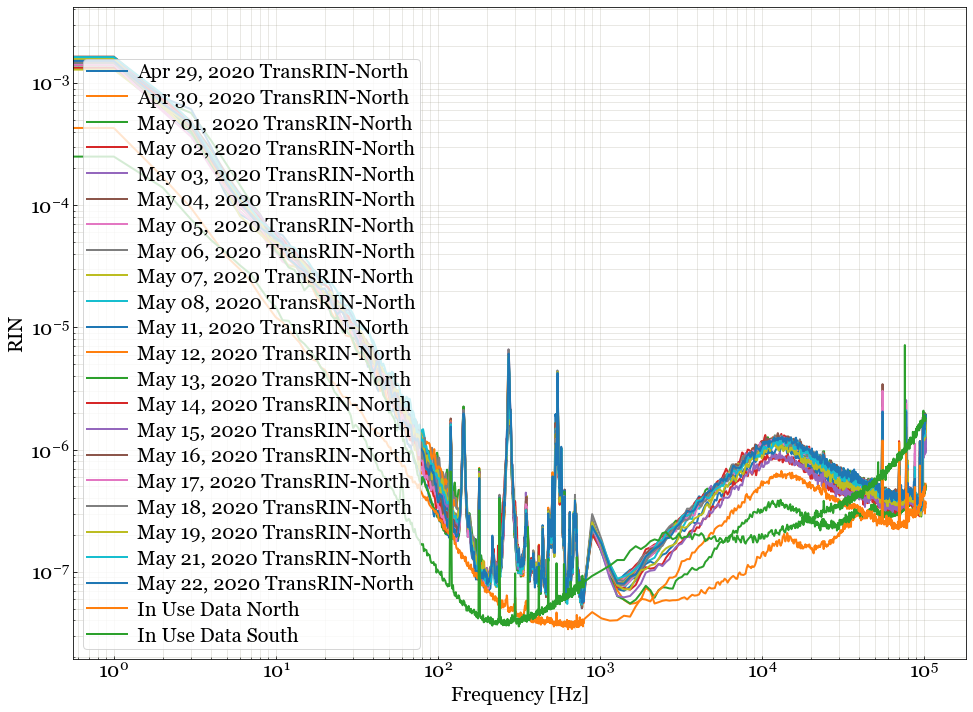

In [4]:
fig = plt.figure()
fl.sort(key=fnTomktime)
cwd = os.getcwd()
os.chdir(dataDir)
for f in fl[:]:
    fig = plotRIN(f, fig)
os.chdir(cwd)
useNData = np.loadtxt('/Users/anchal/Git/cit_ctnlab/ctn_labdata/data/20200305_ISS_OOL_RIN_DC/NRIN_OOL_G20000_Data_2020-03-05.txt')
useSData = np.loadtxt('/Users/anchal/Git/cit_ctnlab/ctn_labdata/data/20200305_ISS_OOL_RIN_DC/SRIN_OOL_G20000_Data_2020-03-06.txt')
ax = fig.gca()
ax.loglog(useNData[:, 0], useNData[:, 1], label='In Use Data North')
ax.loglog(useSData[:, 0], useSData[:, 1], label='In Use Data South')
ax.legend()